In [1]:
import os
import sys
import numpy as np

from tensorflow import keras

module_path = os.path.abspath(os.path.join('..', '..', '..'))

if module_path not in sys.path:
    sys.path.append(os.path.join(module_path))

from functions.augmentation import get_augmentation_layers
from functions.class_weights import calculate_class_weight
from functions.loading_data import load_dataset
from functions.model_running import get_run_number, run_model
from models.efficientnet_v2 import get_v2m_model

In [2]:
WIDTH = 150
HEIGHT = 150
ROOT = os.path.join('..', '..', '..', '..')
DS_NAME = 'data1'
DATA_DIR = os.path.join(
    ROOT,
    '..',
    DS_NAME,
    'images_original_inception_resnet_v2_150x150_categorized')
MODEL_NAME_BASE = 'efficientnet_v2_10_v2m_class_weights_and_bias'

In [3]:
train_ds_dir = os.path.join(DATA_DIR, 'training')
class_dirs = [
    os.path.join(train_ds_dir, class_dir)
    for class_dir in os.listdir(train_ds_dir)
    if os.path.isdir(os.path.join(train_ds_dir, class_dir))]
class_counts = [len(os.listdir(class_dir)) for class_dir in class_dirs]
total_samples = np.sum(class_counts)
initial_biases = np.log(class_counts / (total_samples - class_counts))

In [4]:
BATCH_SIZE = 32
# dataset = load_dataset(HEIGHT, WIDTH, DATA_DIR, 'training', BATCH_SIZE)
# class_weight = calculate_class_weight(dataset, .6)
class_weight = {
    0: 4.528537585685208,
    1: 3.892096468068666,
    2: 3.300900528086318,
    3: 7.75870685219699,
    4: 3.29447516332762,
    5: 2.8658300243916535,
    6: 6.797989842280895}

In [5]:
METRICS = [
    keras.metrics.CategoricalCrossentropy(name='categorical cross entropy'),
    keras.metrics.MeanSquaredError(name='mean squared error'),
    keras.metrics.CategoricalAccuracy(name='accuracy'),
    keras.metrics.AUC(name='auc', multi_label=True),
    keras.metrics.AUC(name='prc', curve='PR', multi_label=True)
]

Found 8015 files belonging to 7 classes.
Found 2000 files belonging to 7 classes.
Epoch 1/100
251/251 [==============================] - ETA: 0s - loss: 5.9234 - categorical cross entropy: 1.6330 - mean squared error: 0.0680 - accuracy: 0.6574 - auc: 0.7652 - prc: 0.2499

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_10_v2m_class_weights_and_bias_20_1\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_10_v2m_class_weights_and_bias_20_1\assets


251/251 [==============================] - 223s 775ms/step - loss: 5.9234 - categorical cross entropy: 1.6330 - mean squared error: 0.0680 - accuracy: 0.6574 - auc: 0.7652 - prc: 0.2499 - val_loss: 0.7928 - val_categorical cross entropy: 0.7928 - val_mean squared error: 0.0535 - val_accuracy: 0.7110 - val_auc: 0.8866 - val_prc: 0.4471 - lr: 0.0010
Epoch 2/100
251/251 [==============================] - 93s 369ms/step - loss: 2.9302 - categorical cross entropy: 0.8048 - mean squared error: 0.0548 - accuracy: 0.7213 - auc: 0.8677 - prc: 0.4146 - val_loss: 0.8248 - val_categorical cross entropy: 0.8248 - val_mean squared error: 0.0493 - val_accuracy: 0.7595 - val_auc: 0.8789 - val_prc: 0.5116 - lr: 0.0010
Epoch 3/100
251/251 [==============================] - ETA: 0s - loss: 2.6805 - categorical cross entropy: 0.7457 - mean squared error: 0.0517 - accuracy: 0.7365 - auc: 0.8916 - prc: 0.4684

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_10_v2m_class_weights_and_bias_20_3\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_10_v2m_class_weights_and_bias_20_3\assets


251/251 [==============================] - 195s 778ms/step - loss: 2.6805 - categorical cross entropy: 0.7457 - mean squared error: 0.0517 - accuracy: 0.7365 - auc: 0.8916 - prc: 0.4684 - val_loss: 0.6516 - val_categorical cross entropy: 0.6516 - val_mean squared error: 0.0453 - val_accuracy: 0.7640 - val_auc: 0.9083 - val_prc: 0.5609 - lr: 0.0010
Epoch 4/100
251/251 [==============================] - 95s 379ms/step - loss: 2.5820 - categorical cross entropy: 0.7223 - mean squared error: 0.0502 - accuracy: 0.7472 - auc: 0.9020 - prc: 0.5103 - val_loss: 1.5850 - val_categorical cross entropy: 1.5850 - val_mean squared error: 0.0528 - val_accuracy: 0.7380 - val_auc: 0.8902 - val_prc: 0.5189 - lr: 0.0010
Epoch 5/100
251/251 [==============================] - ETA: 0s - loss: 2.4766 - categorical cross entropy: 0.6988 - mean squared error: 0.0488 - accuracy: 0.7518 - auc: 0.9122 - prc: 0.5349

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_10_v2m_class_weights_and_bias_20_5\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_10_v2m_class_weights_and_bias_20_5\assets


251/251 [==============================] - 205s 817ms/step - loss: 2.4766 - categorical cross entropy: 0.6988 - mean squared error: 0.0488 - accuracy: 0.7518 - auc: 0.9122 - prc: 0.5349 - val_loss: 0.6309 - val_categorical cross entropy: 0.6309 - val_mean squared error: 0.0453 - val_accuracy: 0.7705 - val_auc: 0.9265 - val_prc: 0.6848 - lr: 0.0010
Epoch 6/100
251/251 [==============================] - 99s 395ms/step - loss: 2.4660 - categorical cross entropy: 0.6948 - mean squared error: 0.0487 - accuracy: 0.7543 - auc: 0.9122 - prc: 0.5475 - val_loss: 0.7291 - val_categorical cross entropy: 0.7291 - val_mean squared error: 0.0497 - val_accuracy: 0.7325 - val_auc: 0.9244 - val_prc: 0.6171 - lr: 0.0010
Epoch 7/100
251/251 [==============================] - ETA: 0s - loss: 2.3834 - categorical cross entropy: 0.6722 - mean squared error: 0.0470 - accuracy: 0.7647 - auc: 0.9155 - prc: 0.5686

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_10_v2m_class_weights_and_bias_20_7\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_10_v2m_class_weights_and_bias_20_7\assets


251/251 [==============================] - 209s 835ms/step - loss: 2.3834 - categorical cross entropy: 0.6722 - mean squared error: 0.0470 - accuracy: 0.7647 - auc: 0.9155 - prc: 0.5686 - val_loss: 0.6291 - val_categorical cross entropy: 0.6291 - val_mean squared error: 0.0426 - val_accuracy: 0.7820 - val_auc: 0.9270 - val_prc: 0.6544 - lr: 0.0010
Epoch 8/100
251/251 [==============================] - 104s 413ms/step - loss: 2.3845 - categorical cross entropy: 0.6762 - mean squared error: 0.0477 - accuracy: 0.7642 - auc: 0.9159 - prc: 0.5684 - val_loss: 0.7119 - val_categorical cross entropy: 0.7119 - val_mean squared error: 0.0500 - val_accuracy: 0.7645 - val_auc: 0.9162 - val_prc: 0.6130 - lr: 0.0010
Epoch 9/100
251/251 [==============================] - ETA: 0s - loss: 2.2754 - categorical cross entropy: 0.6443 - mean squared error: 0.0456 - accuracy: 0.7711 - auc: 0.9228 - prc: 0.5913

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_10_v2m_class_weights_and_bias_20_9\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_10_v2m_class_weights_and_bias_20_9\assets


251/251 [==============================] - 213s 849ms/step - loss: 2.2754 - categorical cross entropy: 0.6443 - mean squared error: 0.0456 - accuracy: 0.7711 - auc: 0.9228 - prc: 0.5913 - val_loss: 0.6064 - val_categorical cross entropy: 0.6064 - val_mean squared error: 0.0416 - val_accuracy: 0.7930 - val_auc: 0.9171 - val_prc: 0.6701 - lr: 0.0010
Epoch 10/100
251/251 [==============================] - 109s 431ms/step - loss: 2.4480 - categorical cross entropy: 0.6906 - mean squared error: 0.0481 - accuracy: 0.7583 - auc: 0.9141 - prc: 0.5519 - val_loss: 0.6163 - val_categorical cross entropy: 0.6163 - val_mean squared error: 0.0426 - val_accuracy: 0.7905 - val_auc: 0.9185 - val_prc: 0.6336 - lr: 0.0010
Epoch 11/100
251/251 [==============================] - 108s 431ms/step - loss: 2.6794 - categorical cross entropy: 0.7430 - mean squared error: 0.0504 - accuracy: 0.7480 - auc: 0.8944 - prc: 0.5099 - val_loss: 0.6555 - val_categorical cross entropy: 0.6555 - val_mean squared error: 0.0

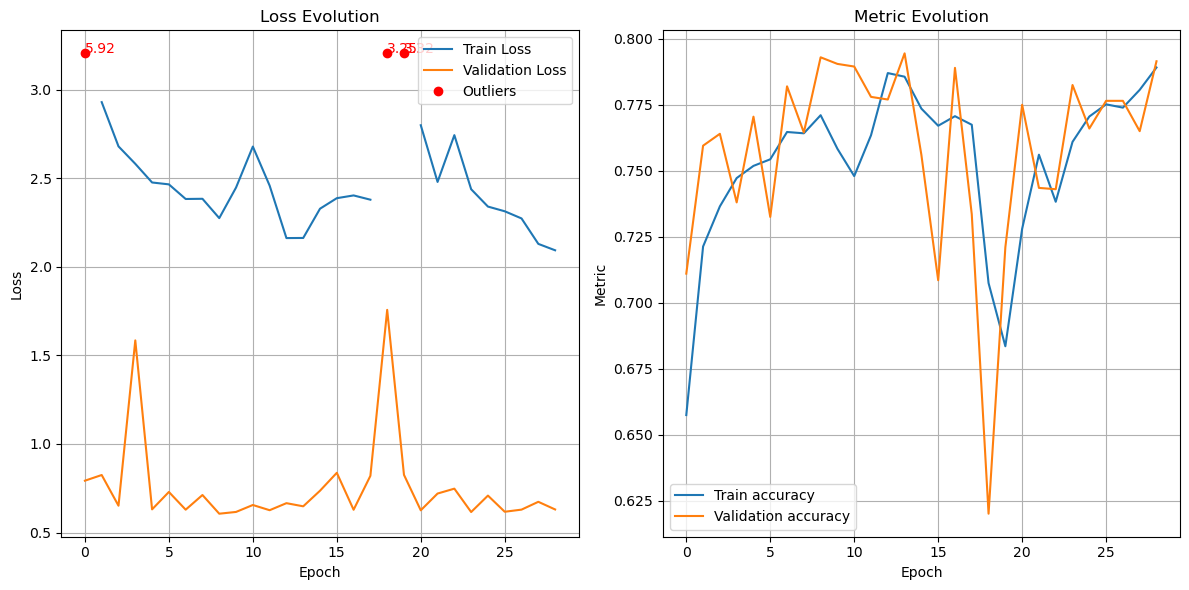

(<keras.engine.functional.Functional at 0x244b0d945b0>,
 <keras.callbacks.History at 0x244b0d94820>)

In [6]:
run_model(
    ROOT,
    HEIGHT,
    WIDTH,
    DATA_DIR,
    DS_NAME,
    MODEL_NAME_BASE,
    lambda num_classes:
        lambda: get_v2m_model(
            HEIGHT,
            WIDTH,
            num_classes,
            metrics=METRICS,
            biases=keras.initializers.Constant(initial_biases)),
    get_augmentation_layers,
    batch_size=BATCH_SIZE,
    class_weight=class_weight,
    stopping_patience=20)